# Visualizing HURDAT2 Data

Read in the cleaned data from the github page (https://github.com/ahaberlie/HURDAT_Analysis)

Direct download link: https://github.com/ahaberlie/HURDAT_Analysis/archive/master.zip

This will download the csv files and code to your computer in a zip file.  Unzip these into your GEOG4016 folder.

The csvs will live in the `data` folder.

In [1]:
import pandas as pd

df = pd.read_csv("../data/hurdat2_cleaned.csv")

df.head()

,identifier,name,num_pts,year,month,day,hour,datetime,date,time,...,lat_f,lon_f,TS,CAT1,CAT2,CAT3,CAT4,CAT5,TROP,max_wind_10kts
0,AL011851,UNNAMED,14,1851,6,25,0,1851-06-25 00:00:00,18510625,0,...,28.0,-94.8,True,True,False,False,False,False,True,80.0
1,AL011851,UNNAMED,14,1851,6,25,6,1851-06-25 06:00:00,18510625,600,...,28.0,-95.4,True,True,False,False,False,False,True,80.0
2,AL011851,UNNAMED,14,1851,6,25,12,1851-06-25 12:00:00,18510625,1200,...,28.0,-96.0,True,True,False,False,False,False,True,80.0
3,AL011851,UNNAMED,14,1851,6,25,18,1851-06-25 18:00:00,18510625,1800,...,28.1,-96.5,True,True,False,False,False,False,True,80.0
4,AL011851,UNNAMED,14,1851,6,25,21,1851-06-25 21:00:00,18510625,2100,...,28.2,-96.8,True,True,False,False,False,False,True,80.0


Here are the available columns:

In [2]:
df.columns

Index(['identifier', 'name', 'num_pts', 'year', 'month', 'day', 'hour',
       'datetime', 'date', 'time', 'record_id', 'status', 'latitude',
       'longitude', 'max_wind', 'min_pressure', 'ne34ktr', 'se34ktr',
       'sw34ktr', 'nw34ktr', 'ne50ktr', 'se50ktr', 'sw50ktr', 'nw50ktr',
       'ne64ktr', 'se64ktr', 'sw64ktr', 'nw64ktr', 'lat_f', 'lon_f', 'TS',
       'CAT1', 'CAT2', 'CAT3', 'CAT4', 'CAT5', 'TROP', 'max_wind_10kts'],
      dtype='object')

Set up matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Plot `min_pressure` as the x variable and `max_wind` as the y variable:

Text(0, 0.5, 'Maximum Wind Speed (kts)')

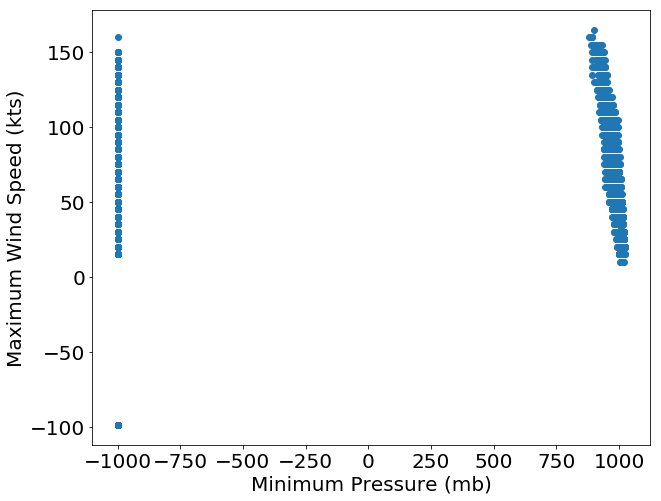

In [4]:
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

plt.scatter(df.min_pressure, df.max_wind)
plt.xlabel("Minimum Pressure (mb)")
plt.ylabel("Maximum Wind Speed (kts)")

Some of the data are missing.  It is always good to examine the dataset to see if the values are realistic.

Print the unique `min_pressure` values:

In [5]:
import numpy as np

print(np.unique(df.min_pressure))

[-999.  882.  888.  889.  892.  895.  897.  899.  900.  901.  902.  905.
  907.  908.  909.  910.  911.  912.  913.  914.  915.  916.  917.  918.
  919.  920.  921.  922.  923.  924.  925.  926.  927.  928.  929.  930.
  931.  932.  933.  934.  935.  936.  937.  938.  939.  940.  941.  942.
  943.  944.  945.  946.  947.  948.  949.  950.  951.  952.  953.  954.
  955.  956.  957.  958.  959.  960.  961.  962.  963.  964.  965.  966.
  967.  968.  969.  970.  971.  972.  973.  974.  975.  976.  977.  978.
  979.  980.  981.  982.  983.  984.  985.  986.  987.  988.  989.  990.
  991.  992.  993.  994.  995.  996.  997.  998.  999. 1000. 1001. 1002.
 1003. 1004. 1005. 1006. 1007. 1008. 1009. 1010. 1011. 1012. 1013. 1014.
 1015. 1016. 1017. 1018. 1019. 1020. 1021. 1022. 1023. 1024.]


Obviously, a pressure of `-999` is suspect.  Indeed, it is a placeholder for missing data.

What about unique `max_wind` values?

In [6]:
print(np.unique(df.max_wind))

[-99.  10.  15.  20.  25.  30.  32.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165.]


Again, -99 is not a valid maximum wind speed in this case, and represents missing data.

We can return only those rows that meet the following criteria:

```
min_pressure != -999 (in other words, minimum pressure DOES NOT EQUAL -999)
max_wind != -99 (in other words, maximum wind DOES NOT EQUAL -99)
```

In [7]:
df_clean = df[(df['min_pressure'] != -999) & (df['max_wind'] != -99)]

print("Rows in Original:", len(df))
print("Filtered Rows:", len(df_clean))

Rows in Original: 50303
Filtered Rows: 19634


### Missing data

We can see that this filter removed approximately 30,000 observations.  It might not surprise you to see that the frequency of missing data decreases with time.

Why is this? Better remote sensing platforms, denser observational networks, and the invention of the airplane.

We can compare the two counts using a histogram (`plt.hist`) based on the year during which the observations occurred.

It is clear that much of the missing wind and pressure data were from before the middle- to late-20th century.

Text(0, 0.5, 'Count of 6h Observations (rows)')

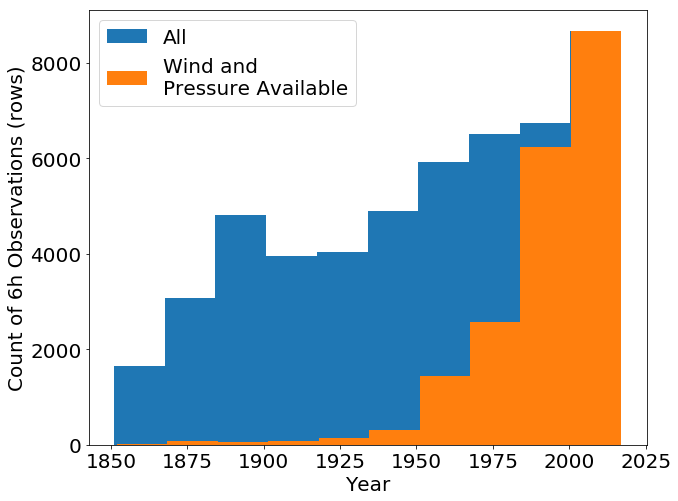

In [8]:
plt.hist(df.year, label='All')
plt.hist(df_clean.year, label='Wind and\nPressure Available')

plt.legend()

plt.xlabel("Year")
plt.ylabel("Count of 6h Observations (rows)")

### Now we can make a readable plot with the remaining data:

(180, 0)

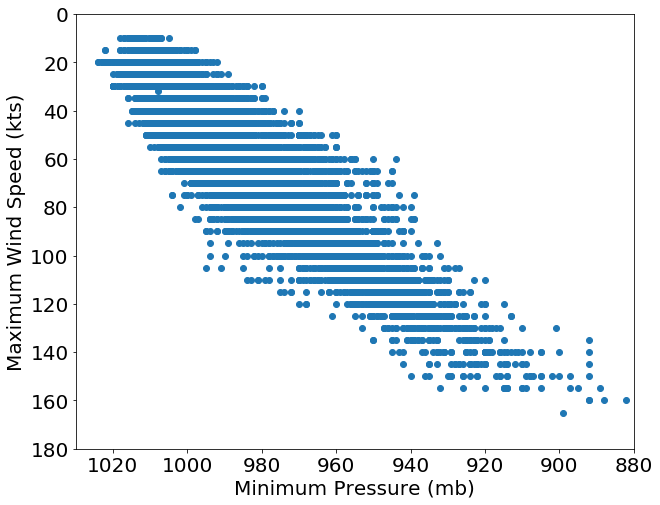

In [9]:
plt.scatter(df_clean.min_pressure, df_clean.max_wind)
plt.xlabel("Minimum Pressure (mb)")
plt.ylabel("Maximum Wind Speed (kts)")

plt.xlim(1030, 880)
plt.ylim(180, 0)

### Using a 2D histogram can help us decipher what is going on in places where there are too many dots:

NOTE: x and y axes are flipped to make the plot look cooler.

Text(0.5, 1.0, 'Count of Observed Pressure\nand Wind Speed')

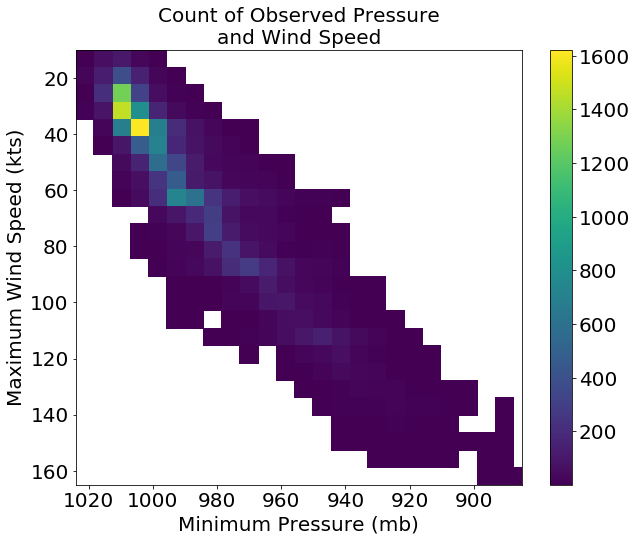

In [10]:
plt.hist2d(df_clean.min_pressure, df_clean.max_wind, bins=(25, 25), cmin=1)
plt.xlabel("Minimum Pressure (mb)")
plt.ylabel("Maximum Wind Speed (kts)")

plt.xlim(1024, 885)
plt.ylim(165, 10)

plt.colorbar()

plt.title("Count of Observed Pressure\nand Wind Speed")

There is clearly a strong negative relationship between minimum pressure and maximum wind speed.

Text(0.5, 1.0, 'Slope: -1.28 Intercept: 1323.00\ncor. coef.: -0.93 p-value: 0.00')

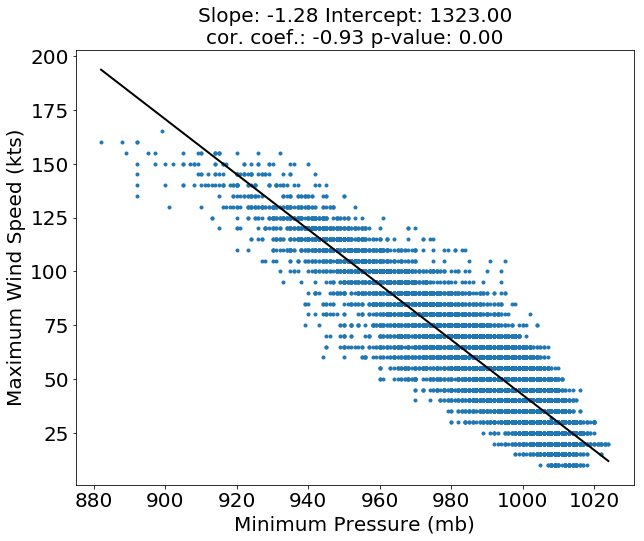

In [11]:
from scipy.stats import linregress

x = df_clean.min_pressure.values
y = df_clean.max_wind.values

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

x_eq = np.linspace(np.min(x), np.max(x), 100)
y_eq = slope * x_eq + intercept

plt.plot(x, y, '.')
plt.xlabel("Minimum Pressure (mb)")
plt.ylabel("Maximum Wind Speed (kts)")

plt.plot(x_eq, y_eq, 'k-')
plt.title("Slope: {:.2f} Intercept: {:.2f}\ncor. coef.: {:.2f} p-value: {:.2f}".format(slope, intercept, rvalue, pvalue))

What would we expect the wind speed (in knots) to be if the minimum surface pressure was 950?

In [12]:
speed = slope * 950 + intercept

print("{:.2f} kts".format(speed))

106.63 kts


Of course, this is very simplified, and if you pick a value outside of this range (say the average surface pressure on Mars), you will get garbage out:

In [13]:
speed = slope * 6 + intercept

print("{:.2f} kts".format(speed))

1315.32 kts


We can see that even for a few specific cases, the prediction can be off by a large amount.

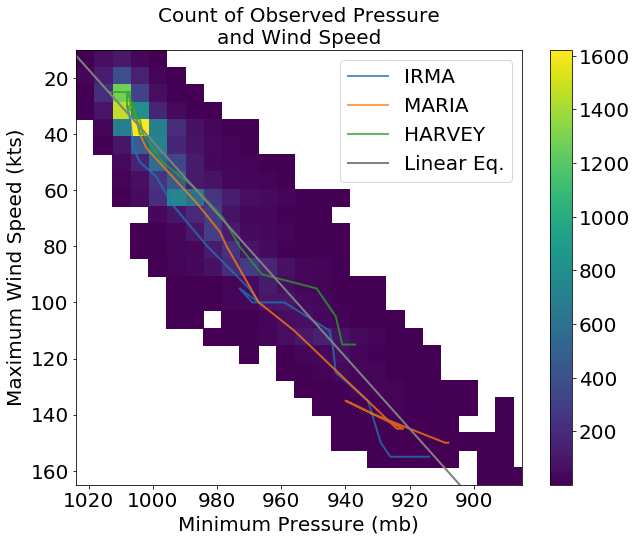

In [14]:
plt.hist2d(df_clean.min_pressure, df_clean.max_wind, bins=(25, 25), cmin=1)
plt.xlabel("Minimum Pressure (mb)")
plt.ylabel("Maximum Wind Speed (kts)")

plt.xlim(1024, 885)
plt.ylim(165, 10)

df_irma = df_clean[(df_clean.name=='IRMA') & (df_clean.year==2017)]
df_maria = df_clean[(df_clean.name=='MARIA') & (df_clean.year==2017)]
df_harvey = df_clean[(df_clean.name=='HARVEY') & (df_clean.year==2017)]

max_irma = np.where(df_irma.min_pressure==np.min(df_irma.min_pressure))[0][0]
max_maria = np.where(df_maria.min_pressure==np.min(df_maria.min_pressure))[0][0]
max_harvey = np.where(df_harvey.min_pressure==np.min(df_harvey.min_pressure))[0][0]

plt.plot(df_irma.min_pressure.values[:max_irma + 1], 
         df_irma.max_wind.values[:max_irma + 1], 
         alpha=0.75, label='IRMA')

plt.plot(df_maria.min_pressure.values[:max_maria + 1], 
         df_maria.max_wind.values[:max_maria + 1], 
         alpha=0.75, label='MARIA')

plt.plot(df_harvey.min_pressure.values[:max_harvey + 1], 
         df_harvey.max_wind.values[:max_harvey + 1], 
         alpha=0.75, label='HARVEY')

plt.plot(x_eq, y_eq, '-', color='Grey', lw=2, label="Linear Eq.")

plt.colorbar()

plt.title("Count of Observed Pressure\nand Wind Speed")

plt.legend()

## The data also come with spatial information about the center of the storm.

Set up a mapping interface like in previous classes.

In [15]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def set_up_map(title="Pass Me A Title"):
    r"""Plot the given data on a map.
    
    ----------
    precip_grid: (X, Y) ndarray
        numpy 2D array
    title: str
        The title of your plot
    Returns
    -------
    view: matplotlib axis
        The updated plot
    """
    
    proj = cartopy.crs.EqualEarth(central_longitude=-60)
    
    view = plt.subplot(1, 1, 1, projection=proj)
    view.set_extent([-110, -20, 10, 50])
    
    states_provinces = cfeature.NaturalEarthFeature(
                        category='cultural',
                        name='admin_1_states_provinces_lines',
                        scale='50m',
                        facecolor='none')
    
    view.add_feature(cfeature.COASTLINE)
    view.add_feature(cfeature.LAKES)
    view.add_feature(cfeature.BORDERS)
    view.add_feature(states_provinces, edgecolor='black')
    view.set_title(title)
    view.stock_img()
    
    return view

`set_up_map` returns an axis interface on which you can plot things.  In this case, the map is set up to use lat/lon coordinates, so little extra work has to be done.

The interface is supposed to be the same matplotlib.  Here we plot a line between the 6h observations for Irma, and then plot dots along that line (using `scatter`) that are color-coded by the maximum wind speed at those locations.

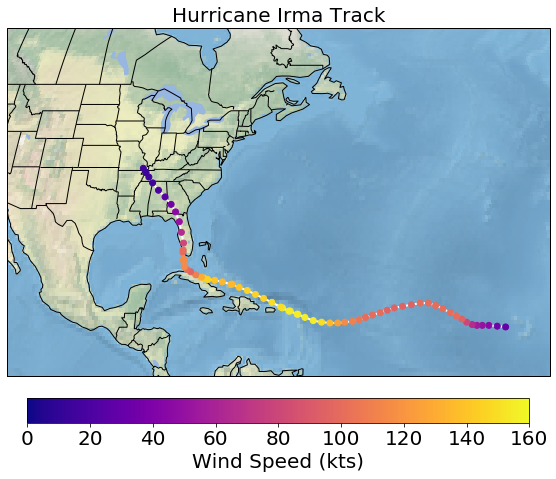

In [16]:
view = set_up_map("Hurricane Irma Track")

view.plot(df_irma.lon_f.values, df_irma.lat_f.values, 'w-', transform=ccrs.PlateCarree())
mmp = view.scatter(df_irma.lon_f.values, df_irma.lat_f.values, 
                   c=df_irma.max_wind, cmap='plasma', 
                   vmin=0, vmax=160, zorder=5, label='Wind Speed', transform=ccrs.PlateCarree())

cbar = plt.colorbar(mmp, ax=view, shrink=0.9, pad=0.05, orientation='horizontal')
cbar.set_label('Wind Speed (kts)')

Pure matplotlib would look like this:

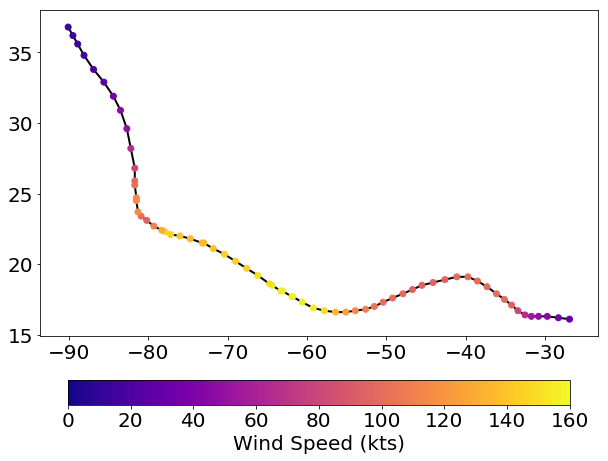

In [17]:
plt.plot(df_irma.lon_f.values, df_irma.lat_f.values, 'k-')
plt.scatter(df_irma.lon_f.values, df_irma.lat_f.values, 
                   c=df_irma.max_wind, cmap='plasma', 
                   vmin=0, vmax=160, zorder=5, label='Wind Speed')

cbar = plt.colorbar(shrink=0.9, pad=0.1, orientation='horizontal')
cbar.set_label('Wind Speed (kts)')

### Do the same for Harvey and Maria

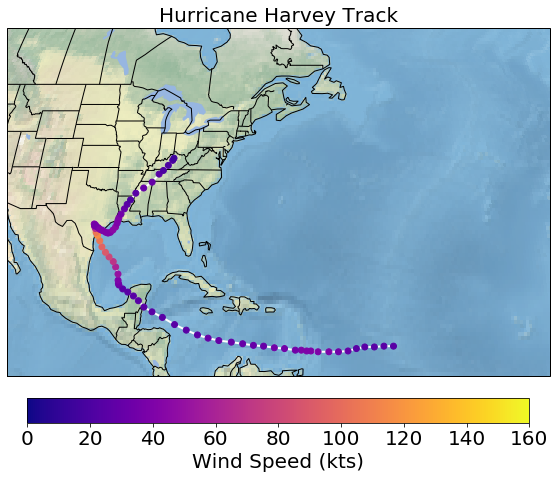

In [18]:
view = set_up_map("Hurricane Harvey Track")

view.plot(df_harvey.lon_f.values, df_harvey.lat_f.values, 'w-', transform=ccrs.PlateCarree())

mmp = view.scatter(df_harvey.lon_f.values, df_harvey.lat_f.values, 
                   c=df_harvey.max_wind, cmap='plasma', 
                   vmin=0, vmax=160, zorder=5, label='Wind Speed', transform=ccrs.PlateCarree())

cbar = plt.colorbar(mmp, ax=view, shrink=0.9, pad=0.05, orientation='horizontal')
cbar.set_label('Wind Speed (kts)')

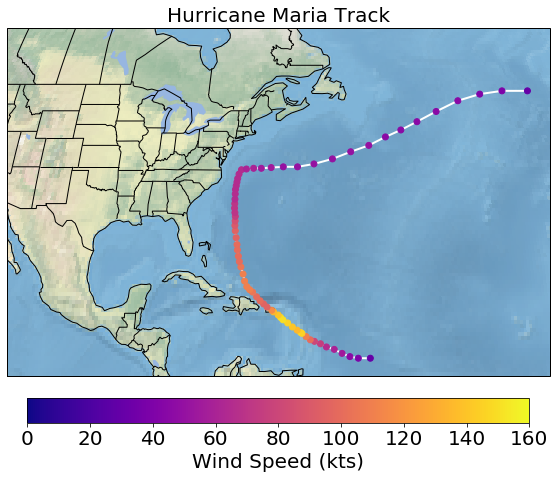

In [19]:
view = set_up_map("Hurricane Maria Track")

view.plot(df_maria.lon_f.values, df_maria.lat_f.values, 'w-', transform=ccrs.PlateCarree())
mmp = view.scatter(df_maria.lon_f.values, df_maria.lat_f.values, 
                   c=df_maria.max_wind, cmap='plasma', 
                   vmin=0, vmax=160, zorder=5, label='Wind Speed', transform=ccrs.PlateCarree())

cbar = plt.colorbar(mmp, ax=view, shrink=0.9, pad=0.05, orientation='horizontal')
cbar.set_label('Wind Speed (kts)')

### You can use pandas to easily plot all of the storms in the 2017 season.

First, get all storms from 2017:

In [20]:
df_2017 = df_clean[df_clean.year==2017]

Next, get only those storms that are CAT1 or higher and have a status of 'HU' or 'TS':

In [21]:
df_2017_hurrs = df_2017[(df_2017.CAT1) & (df_2017.TROP)]

Let's plot some basic stats about the 2017 hurricane season:

In [22]:
print("Total Number of Storms in 2017:", df_2017['name'].nunique())
print("Total Number of Hurricanes in 2017:", df_2017_hurrs['name'].nunique())
print("Total Number of Major Hurricanes in 2017:", df_2017_hurrs[df_2017_hurrs.CAT3]['name'].nunique())

Total Number of Storms in 2017: 18
Total Number of Hurricanes in 2017: 10
Total Number of Major Hurricanes in 2017: 6


Break it down by month using `groupby`.

NOTE: `resample` is useful for some tasks like annual/cumulative/running totals, but for months, it treats each month as a unique occurrence.  For example, January 2019 is not in the same group as January 2018.  

However, if you groupby `month`, these two will be treated as the same group, as long as your `month` format only has 12 unique values.

In [23]:
import calendar 

months = df_2017_hurrs.groupby('month')

print("Total Number of Hurricanes By Month in 2017:")

for gid, group in months:
    
    print(calendar.month_name[gid], "count:", group['name'].nunique())
    print("Storm Names:", group['name'].unique())

Total Number of Hurricanes By Month in 2017:
August count: 4
Storm Names: ['FRANKLIN' 'GERT' 'HARVEY' 'IRMA']
September count: 5
Storm Names: ['IRMA' 'JOSE' 'KATIA' 'LEE' 'MARIA']
October count: 2
Storm Names: ['NATE' 'OPHELIA']


Find out the unique hurricane storm names.  

NOTE: You do not want to just plot `df_2017_hurrs` because you will miss the parts of the track that are from when the storm was a 'Tropical Storm' or an 'Extratropical Storm':

In [24]:
ids = np.unique(df_2017_hurrs['identifier'].values)

print(ids)

['AL072017' 'AL082017' 'AL092017' 'AL112017' 'AL122017' 'AL132017'
 'AL142017' 'AL152017' 'AL162017' 'AL172017']


Use `groupby` to loop thorugh all of the storms based on their unique `identifier`.

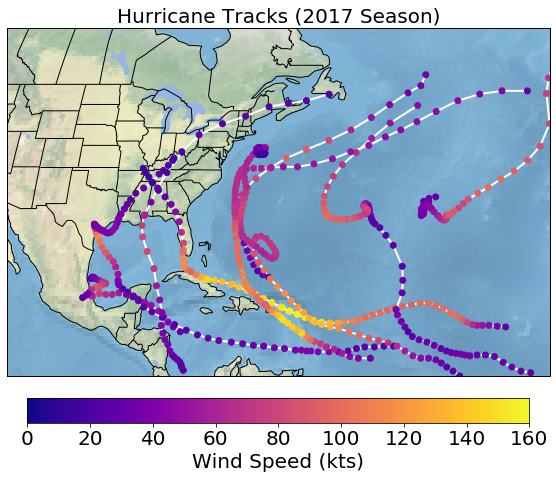

In [25]:
view = set_up_map("Hurricane Tracks (2017 Season)")

for gid, group in df_2017[df_2017['identifier'].isin(ids)].groupby('identifier'):

    view.plot(group.lon_f.values, group.lat_f.values, 'w-', transform=ccrs.PlateCarree())
    mmp = view.scatter(group.lon_f.values, group.lat_f.values, 
                       c=group.max_wind, cmap='plasma',
                       vmin=0, vmax=160, zorder=5, label='Wind Speed', transform=ccrs.PlateCarree())

cbar = plt.colorbar(mmp, ax=view, shrink=0.9, pad=0.05, orientation='horizontal')
cbar.set_label('Wind Speed (kts)')